In [1]:
import glob
from datetime import datetime
from datetime import timedelta
import numpy as np
import pandas as pd
import xarray as xr
import multiprocessing as mp
import matplotlib.pyplot as plt

/glade/work/jhayron/conda-envs/cnn_wr/lib/python3.9/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# full_dataset = xr.open_dataset('/glade/derecho/scratch/jhayron/PRECIP_ERA5_Daily.nc')
# data_mm = full_dataset.PrecipitationRate * 3600
# data_mm_day = data_mm * 24
# data_mm_day.attrs['long_name'] = 'Daily cumulative precipitation'
# data_mm_day.attrs['units'] = 'mm/day'
# data_mm_day = data_mm_day.to_dataset(name='DailyPrecip')
# data_mm_day.to_netcdf('/glade/derecho/scratch/jhayron/PRECIP_ERA5_Daily_mm.nc')

In [3]:
data_mm_day = xr.open_dataset('/glade/derecho/scratch/jhayron/PRECIP_ERA5_Daily_mm.nc')
data_mm_day = data_mm_day.sel(time=slice('1940-01-01','2023-12-31'))

In [4]:
DailyPrecip = data_mm_day.DailyPrecip

In [5]:
precipitation_anomalies = xr.open_dataset('/glade/derecho/scratch/jhayron/PRECIP_ERA5_DailyAnoms_mm.nc')

In [8]:
PrecipAnoms = precipitation_anomalies.PrecipAnoms

# Dry and wet days via anomalies

In [45]:
WetDaysAnoms = PrecipAnoms.copy()
# Define your threshold
threshold = 0  # Replace this with your actual threshold
# Create a new DataArray with 0s and 1s
WetDaysAnoms = xr.where(WetDaysAnoms < threshold, 0, 1)

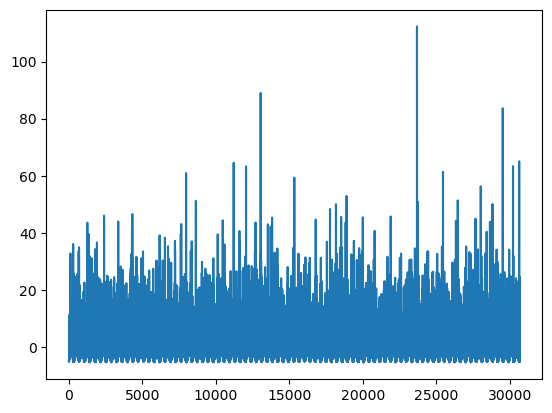

In [46]:
timeseries = PrecipAnoms.sel(lon=210, lat=45)
timeseriesbinary = WetDaysAnoms.sel(lon=210, lat=45)
plt.plot(timeseries)

(array([21636.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9045.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

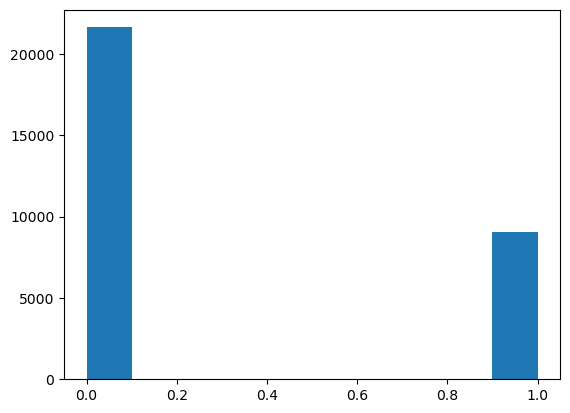

In [48]:
plt.hist(timeseriesbinary)

In [28]:
bins = np.linspace(-10, 60, 21)

(array([0.0000e+00, 8.1160e+03, 1.4265e+04, 3.6460e+03, 1.9530e+03,
        1.0980e+03, 5.9700e+02, 3.8800e+02, 2.3800e+02, 1.4500e+02,
        7.6000e+01, 5.5000e+01, 4.4000e+01, 1.4000e+01, 1.0000e+01,
        1.7000e+01, 2.0000e+00, 6.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([-10. ,  -6.5,  -3. ,   0.5,   4. ,   7.5,  11. ,  14.5,  18. ,
         21.5,  25. ,  28.5,  32. ,  35.5,  39. ,  42.5,  46. ,  49.5,
         53. ,  56.5,  60. ]),
 <BarContainer object of 20 artists>)

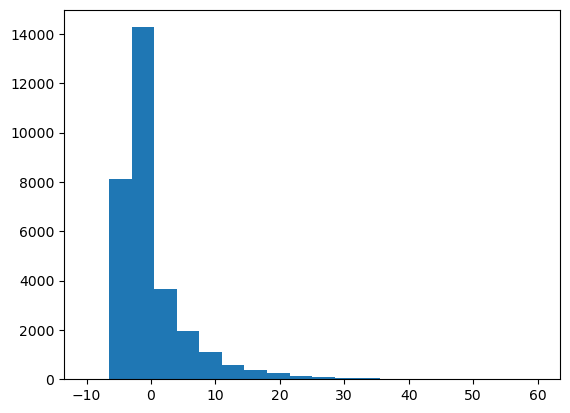

In [29]:
plt.hist(timeseries, bins=bins)

# Dry and wet days via original data

In [49]:
WetDays_mm = DailyPrecip.copy()
# Define your threshold
threshold = 5  # Replace this with your actual threshold
# Create a new DataArray with 0s and 1s
WetDays_mm = xr.where(WetDays_mm < threshold, 0, 1)

In [64]:
WetDays_1mm = DailyPrecip.copy()
# Define your threshold
threshold = 1  # Replace this with your actual threshold
# Create a new DataArray with 0s and 1s
WetDays_1mm = xr.where(WetDays_mm < threshold, 0, 1)

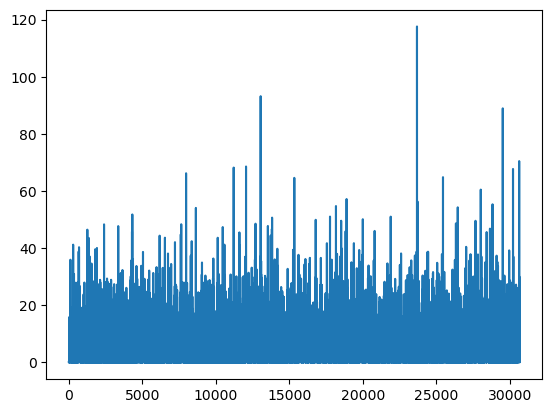

In [50]:
timeseries = DailyPrecip.sel(lon=210, lat=45)
timeseriesbinary = WetDays_mm.sel(lon=210, lat=45)
plt.plot(timeseries)

(array([23006.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  7675.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

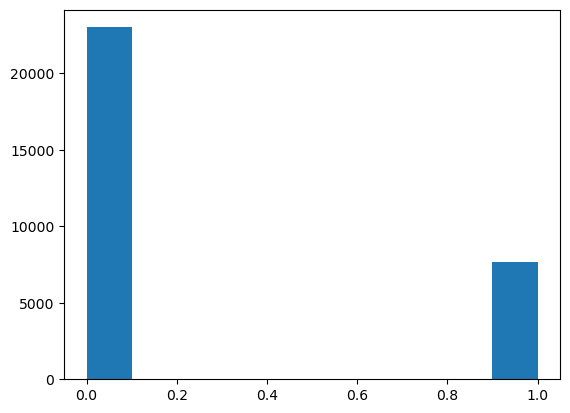

In [51]:
plt.hist(timeseriesbinary)

In [52]:
bins = np.linspace(0, 60, 15)

(array([2.2069e+04, 4.2260e+03, 2.1180e+03, 1.0270e+03, 5.2600e+02,
        3.3100e+02, 1.6900e+02, 8.0000e+01, 5.9000e+01, 2.7000e+01,
        1.7000e+01, 1.4000e+01, 5.0000e+00, 2.0000e+00]),
 array([ 0.        ,  4.28571429,  8.57142857, 12.85714286, 17.14285714,
        21.42857143, 25.71428571, 30.        , 34.28571429, 38.57142857,
        42.85714286, 47.14285714, 51.42857143, 55.71428571, 60.        ]),
 <BarContainer object of 14 artists>)

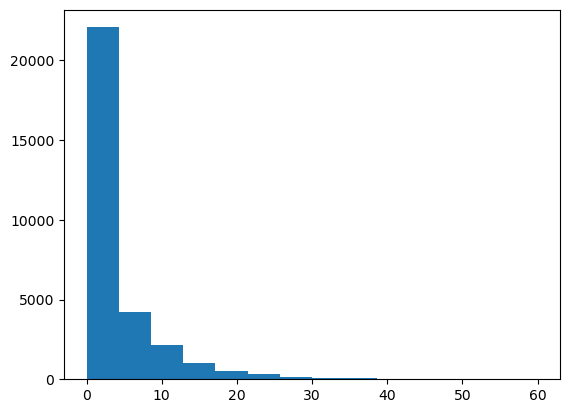

In [53]:
plt.hist(timeseries, bins=bins)

# Extreme precipitation

In [54]:
# Calculate the threshold based on the desired percentile for each grid cell
percentile_value = 80  # Replace with your desired percentile (e.g., 95 for the 95th percentile)
threshold = PrecipAnoms.quantile(percentile_value / 100.0, dim='time')

# Create a new DataArray with 0s and 1s based on the threshold
ExtremeAnoms = xr.where(PrecipAnoms < threshold, 0, 1)

In [55]:
timeseries = PrecipAnoms.sel(lon=210, lat=45)
timeseriesbinary = ExtremeAnoms.sel(lon=210, lat=45)

(array([24544.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  6137.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

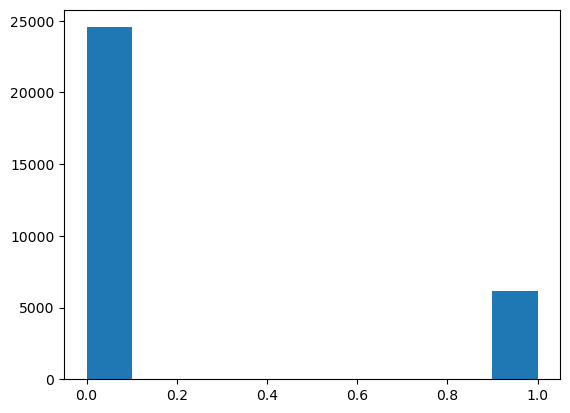

In [56]:
plt.hist(timeseriesbinary)

In [59]:
# Calculate the threshold based on the desired percentile for each grid cell
percentile_value = 90  # Replace with your desired percentile (e.g., 95 for the 95th percentile)
threshold = PrecipAnoms.quantile(percentile_value / 100.0, dim='time')

# Create a new DataArray with 0s and 1s based on the threshold
ExtremeAnoms_90 = xr.where(PrecipAnoms < threshold, 0, 1)

In [62]:
timeseries = PrecipAnoms.sel(lon=210, lat=45)
timeseriesbinary = ExtremeAnoms_90.sel(lon=210, lat=45)

(array([27612.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  3069.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

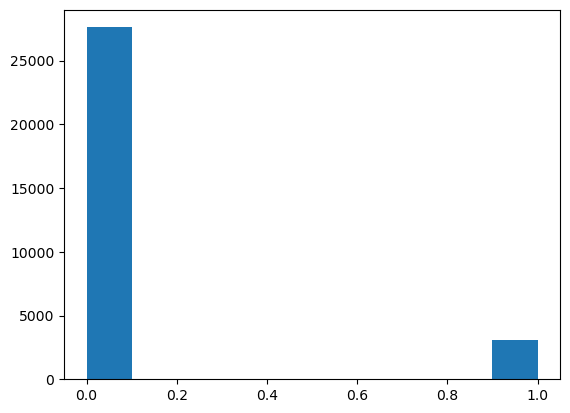

In [63]:
plt.hist(timeseriesbinary)

# save files

In [65]:
WetDaysAnoms.to_netcdf('/glade/derecho/scratch/jhayron/WetDaysAnoms.nc')
WetDays_mm.to_netcdf('/glade/derecho/scratch/jhayron/WetDays_5mm.nc')
WetDays_1mm.to_netcdf('/glade/derecho/scratch/jhayron/WetDays_1mm.nc')
ExtremeAnoms_90.to_netcdf('/glade/derecho/scratch/jhayron/ExtremePrecipAnoms_p90.nc')
ExtremeAnoms.to_netcdf('/glade/derecho/scratch/jhayron/ExtremePrecipAnoms_p80.nc')